In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#from matplotlib.animation import PillowWriter
from abc import ABC, abstractmethod

In [101]:
class AbstractPlate(ABC):
    
    def __init__(self, l = 1, N = 100):
        
        # constantes:
        self.length    = l     # comprimento da barra [m]
        self.divisions = N     # número de divisões do domínio

        # vetor usado para a plotagem:
        self.x_coords = np.linspace(0.0, self.length, N + 1)
        self.temps    = np.zeros(N + 1)

        self.delta_x = self.length / N
        self.delta_t = pow(self.delta_x, 2) * 0.2
        self.cte     = self.delta_t / pow(self.delta_x, 2)

    @abstractmethod
    def set_initial_cond(self) -> None:
        pass

    # efetua a mudança de temp.:
    def change_temp(self, final_dt):
        prev = self.temps
        for k in range(1, final_dt + 1):
            for i in range(1, self.divisions):
                self.temps[i] += self.cte * prev[i + 1]
                self.temps[i] += self.cte * prev[i - 1]
                self.temps[i] -= self.cte * prev[i] * 2
            prev = np.copy(self.temps)
        
        self.current_time = k * self.delta_t

***
### Perfil do código de ref.:

In [102]:
class Bar(AbstractPlate):
    
    def set_initial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições de contorno:
        #                                     T(x,0) = 0
        self.temps[0] = Temp_i0             # T(0,t) = 0
        self.temps[N] = Temp_il             # T(L,t) = 1

# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "1"
}

exe = Bar()
exe.set_initial_cond(**boundaries)
exe.change_temp(100)


print("delta x: ", exe.delta_x,
    "\ndelta t: ", exe.delta_t,
    "\ncte    : ", exe.cte)

delta x:  0.01 
delta t:  2e-05 
cte    :  0.2


***
### Propostas:

Apresente a solução de cada problema em diferentes instantes de tempo (escolha pelo menos 4 instantes de tempo para cada caso: um no começo, dois intermediários e um representando o regime permanente, ou seja, para $t$ grande). Comente o que acontece com o perfil de temperatura quando $t\to \inf$. É o esperado? Compare a solução em cada tempo com a solução analítica. Resolva com diferentes valores de $\Delta x$ e compare os resultados. Em todos os problemas deve ser analisada também a dependência da solução com o tamanho do $\Delta x$ e do $\Delta t$ escolhidos. Atenção: devemos ter sempre $\Delta t < \frac{\Delta x^{2}}{2}$. O que acontece quando essa condição não é obedecida? Faça alguns testes. Investigue também qual é a influência de alpha na solução. Os códigos desenvolvidos devem ser enviados separadamente.

### Solução geral:

$$\frac{\partial T(x,t)}{\partial t} = \frac{\partial^{2} T(x,t)}{\partial x^{2}}$$

$$t > 0,\qquad 0 < x < L$$

### Solução numérica - Problema 1:

**Condições de contorno:**

$$\begin{align*}
T(0,t) = 0 \quad \text{e} \quad T(L,t) = 0, \quad & \text{para} \; \: t\ge 0  \\
T(x,0) = 1, \quad & \text{para} \; \: 0 < x < L                               \\
\end{align*}$$

delta x:  0.01 
delta t:  2e-05 
cte    :  0.2


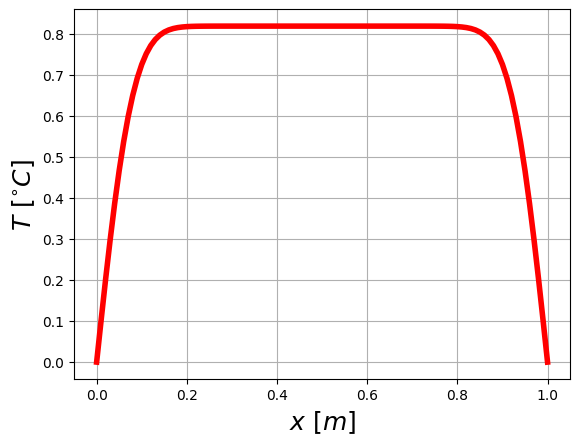

In [103]:
class Bar(AbstractPlate):
    
    def set_initial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições iniciais:
        T_boundary = np.ones(N + 1)         # T(x,0) = 1
        
        # impondo as condições de contorno:
        T_boundary[0] = Temp_i0             # T(0,t) = 0
        T_boundary[N] = Temp_il             # T(L,t) = 0
        self.temps = np.copy(T_boundary)


# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "0"
}

bar = Bar()
bar.set_initial_cond(**boundaries)
bar.change_temp(100)

print("delta x: ", bar.delta_x,
    "\ndelta t: ", bar.delta_t,
    "\ncte    : ", bar.cte)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# figura:
fig, profile = plt.subplots()

profile.set_ylabel('$T$ $[^{\circ}C]$', fontsize = 18)
profile.set_xlabel('$x$ $[m]$', fontsize = 18)
profile.grid(True)

keywargs = {
    "ls"    : "-",
    "lw"    : "4",
    "color" : "red",
}

save_kwargs = {
    "dpi"         : 1200,
    "format"      : "pdf",
    "bbox_inches" : "tight"
}

profile.plot(bar.x_coords, bar.temps, **keywargs)
fig.savefig('perfil-de-temp-1.pdf', **save_kwargs)

***
### Solução numérica - Problema 2:

**Condições de contorno:**

$$\begin{align*}
T(0,t) = 1 \quad \text{e} \quad T(L,t) = 0, \quad & \text{para} \; \: t\ge 0  \\
T(x,0) = 0, \quad & \text{para} \; \: 0 < x < L                               \\
\end{align*}$$

delta x:  0.01 
delta t:  2e-05 
cte    :  0.2


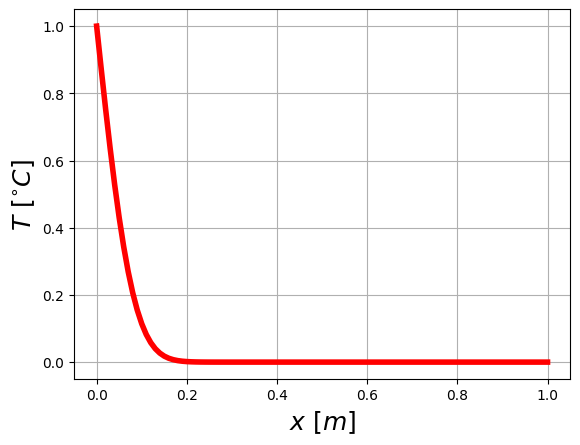

In [104]:
class Bar(AbstractPlate):
    
    def set_initial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições de contorno:
        #                                     T(x,0) = 0
        self.temps[0] = Temp_i0             # T(0,t) = 1
        self.temps[N] = Temp_il             # T(L,t) = 0
        
# condições de contorno:
boundaries = {
    "Temp_i0" : "1",
    "Temp_il" : "0"
}

sec_bar = Bar()
sec_bar.set_initial_cond(**boundaries)
sec_bar.change_temp(100)

print("delta x: ", sec_bar.delta_x,
    "\ndelta t: ", sec_bar.delta_t,
    "\ncte    : ", sec_bar.cte)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# figura:
fig, profile = plt.subplots()

profile.set_ylabel('$T$ $[^{\circ}C]$', fontsize = 18)
profile.set_xlabel('$x$ $[m]$', fontsize = 18)
profile.grid(True)

keywargs = {
    "ls"    : "-",
    "lw"    : "4",
    "color" : "red",
}

save_kwargs = {
    "dpi"         : 1200,
    "format"      : "pdf",
    "bbox_inches" : "tight"
}

profile.plot(sec_bar.x_coords, sec_bar.temps, **keywargs)
fig.savefig('perfil-de-temp-2.pdf', **save_kwargs)

***
### Solução numérica - Problema 3:

**Condições de contorno:**

$$\begin{align*}
T(0,t) = 0 \quad \text{e} \quad T(L,t) = 0, \quad & \text{para} \; \: t\ge 0  \\
T(x,0) = sin(\frac{\pi x}{2}), \quad & \text{para} \; \: 0 < x < L            \\
\end{align*}$$

delta x:  0.02 
delta t:  8e-05 
cte    :  0.2


MovieWriter ffmpeg unavailable; using Pillow instead.


para um valor de k = 1
para um valor de k = 1
para um valor de k = 2
para um valor de k = 3
para um valor de k = 4
para um valor de k = 5
para um valor de k = 6
para um valor de k = 7
para um valor de k = 8
para um valor de k = 9
para um valor de k = 10
para um valor de k = 11
para um valor de k = 12
para um valor de k = 13
para um valor de k = 14
para um valor de k = 15
para um valor de k = 16
para um valor de k = 17
para um valor de k = 18
para um valor de k = 19
para um valor de k = 20
para um valor de k = 21
para um valor de k = 22
para um valor de k = 23
para um valor de k = 24
para um valor de k = 25
para um valor de k = 26
para um valor de k = 27
para um valor de k = 28
para um valor de k = 29
para um valor de k = 30
para um valor de k = 31
para um valor de k = 32
para um valor de k = 33
para um valor de k = 34
para um valor de k = 35
para um valor de k = 36
para um valor de k = 37
para um valor de k = 38
para um valor de k = 39
para um valor de k = 40
para um valor de k = 41
pa

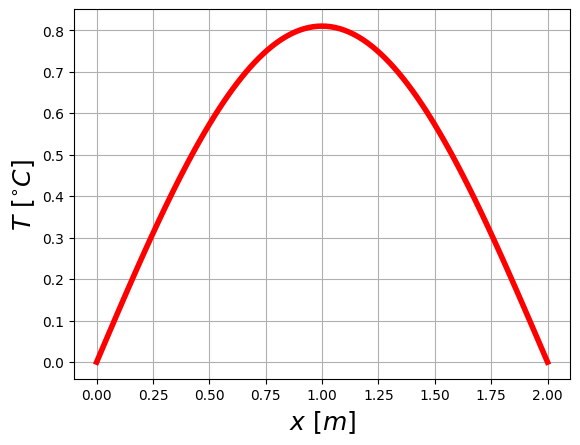

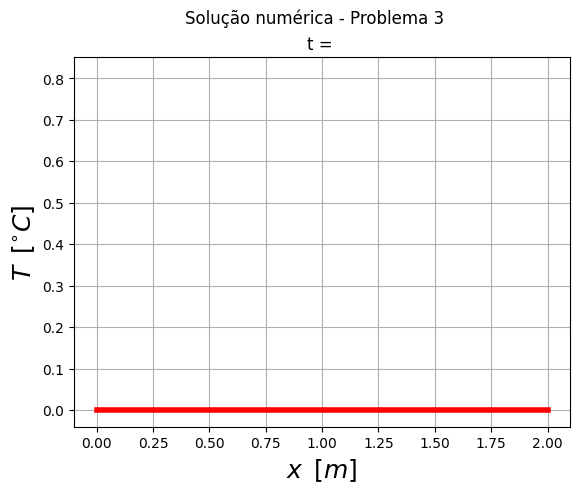

In [162]:
class Bar(AbstractPlate):
    
    def set_initial_cond(self, Temp_i0, Temp_il) -> None:

        # impondo as condições iniciais:
        # T(0,t) = T(L,t) = 0
        T_boundary = np.copy(self.temps)
        for i in range(self.divisions):
            x = i * self.delta_x
            T_boundary[i] = np.sin(np.pi * x / 2)
        
        self.temps = np.copy(T_boundary)

# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "0"
}

thr_bar = Bar(l = 2)    # comprimento da barra : 2 [m]
thr_bar.set_initial_cond(**boundaries)

final_k = 50
thr_bar.change_temp(final_k)

print("delta x: ", thr_bar.delta_x,
    "\ndelta t: ", thr_bar.delta_t,
    "\ncte    : ", thr_bar.cte)


# ---------------- figura:
fig, profile = plt.subplots()

profile.set_ylabel('$T$ $[^{\circ}C]$', fontsize = 18)
profile.set_xlabel('$x$ $[m]$', fontsize = 18)
profile.grid(True)

keywargs = {
    "ls"    : "-",
    "lw"    : "4",
    "color" : "red",
}

save_kwargs = {
    "dpi"         : 1200,
    "format"      : "pdf",
    "bbox_inches" : "tight"
}

profile.plot(thr_bar.x_coords, thr_bar.temps, **keywargs)
fig.savefig('perfil-de-temp-3.pdf', **save_kwargs)


# ---------------- gif:
frames = int(final_k / thr_bar.delta_t)

gif, ax = plt.subplots()

gif.suptitle('Solução numérica - Problema 3')

ax.set_title('t = ')
ax.set_ylabel('$T \; \: [^{\circ}C]$', fontsize = 18)
ax.set_xlabel('$x \; \: [m]$', fontsize = 18)
ax.grid(True)

curve, = ax.plot(thr_bar.x_coords, thr_bar.temps, **keywargs)

def update(k):
    k += 1  #como a função não está definida para t = 0
    print("para um valor de k =", k)
    thr_bar.change_temp(k)
    curve.set_data(thr_bar.x_coords, thr_bar.temps)

anim = FuncAnimation(gif, update, frames = 100, interval = 100)
anim.save('gif-3.gif')

In [127]:
type(fig)
help(type(fig))

Help on class Figure in module matplotlib.figure:

class Figure(FigureBase)
 |  Figure(figsize=None, dpi=None, *, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None, layout=None, **kwargs)
 |  
 |  The top level container for all the plot elements.
 |  
 |  Attributes
 |  ----------
 |  patch
 |      The `.Rectangle` instance representing the figure background patch.
 |  
 |  suppressComposite
 |      For multiple images, the figure will make composite images
 |      depending on the renderer option_image_nocomposite function.  If
 |      *suppressComposite* is a boolean, this will override the renderer.
 |  
 |  Method resolution order:
 |      Figure
 |      FigureBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tig

***
### Código para a solução númerica da condução de calor 2D:

**Condições de contorno:**
- Aquecida na superfície de cima
- Resfriada nas superfícies laterais e inferiores

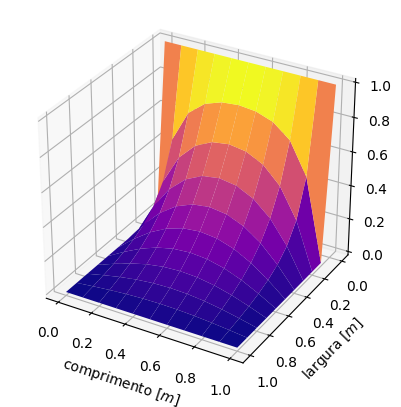

In [165]:
num_x = 10 # número de divisões, em x, do domínio
num_y = 10 # número de divisões, em y, do domínio
L = 1.0    # comprimento/largura da placa

xx = np.linspace(0.0, L, num_x + 1)
yy = np.linspace(0.0, L, num_y + 1)

x_coords, y_coords = np.meshgrid(xx, yy)

delta_x = L / num_x
delta_y = L / num_y
delta_t = 0.2 * pow(delta_x, 2)

temp = np.zeros((num_x + 1, num_y + 1), float)

# condições de contorno:
for i in range(num_x + 1):
    # temperatura superior:
    temp[0][i] = 1.0
new_temp = np.copy(temp)

#( delta_t / pow(delta_x, 2) )
final_k = 1000
for k in range(1, final_k + 1):
    for i in range(1, num_x):
        for j in range(1, num_y):
            # resolve para x:
            new_temp[j][i] += 0.2 * temp[j][i + 1]
            new_temp[j][i] -= 0.4 * temp[j][i]
            new_temp[j][i] += 0.2 * temp[j][i - 1]
            # resolve para y:
            new_temp[j][i] += 0.2 * temp[j + 1][i]
            new_temp[j][i] -= 0.4 * temp[j][i]
            new_temp[j][i] += 0.2 * temp[j - 1][i]
    temp = np.copy(new_temp)


# ---------------- superfície:


# ---- teste 1{
#fig, surf = plt.subplots(projection = '3d')
#surf.plot_surface(x_coords, y_coords, temp, cmap = cm.plasma)
# ----------- }


fig = plt.figure()

surf = fig.add_subplot(projection = '3d')
surf.plot_surface(x_coords, y_coords, temp, cmap = cm.plasma)

fs = 10
#surf.set_zlabel('$T$ $[^{\circ}C]$', fontsize = fs)
surf.set_ylabel('largura $[m]$',     fontsize = fs)
surf.set_xlabel('comprimento $[m]$', fontsize = fs)
surf.set_aspect('equal')
surf.invert_yaxis()

save_kwargs = {
    "dpi"         : 1200,
    "format"      : "pdf",
    #"bbox_inches" : "tight"
}
fig.savefig('superficie-de-calor.pdf', **save_kwargs)

In [160]:
# ---------------- gif:


# ---- teste 1{
#frames = int(final_k / thr_bar.delta_t)
#gif, ax = plt.subplots(projection = '3d')
#gif.suptitle('Superficie')
# ----------- }


#fig = plt.figure()

#ax = fig.add_subplot(projection = '3d')
#ax.plot_surface(x_coords, y_coords, temp, cmap = cm.plasma)

#ax.set_zlabel('$T$ $[^{\circ}C]$', fontsize = fs)

#ax.set_ylabel('largura $[m]$',     fontsize = fs)
#ax.set_xlabel('comprimento $[m]$', fontsize = fs)
#ax.set_aspect('equal')
#ax.invert_yaxis()

#curve = ax.plot_surface(x_coords, y_coords, temp, cmap = cm.plasma)
#curve.set_animated(True)
print(type(curve))

def update(final_k):
    final_k += 1  #como a função não está definida para t = 0
    print("para um valor de final_k =", final_k)
    for k in range(1, final_k + 1):
        for i in range(1, num_x):
            for j in range(1, num_y):
                # resolve para x:
                new_temp[j][i] += 0.2 * temp[j][i + 1]
                new_temp[j][i] -= 0.4 * temp[j][i]
                new_temp[j][i] += 0.2 * temp[j][i - 1]
                # resolve para y:
                new_temp[j][i] += 0.2 * temp[j + 1][i]
                new_temp[j][i] -= 0.4 * temp[j][i]
                new_temp[j][i] += 0.2 * temp[j - 1][i]
            temp = np.copy(new_temp)
    curve.set_data(x_coords, y_coords, temp)

#anim = FuncAnimation(gif, update, frames = 50, interval = 100)
#anim.save('gif-superficie.gif')

<class 'matplotlib.lines.Line2D'>


In [156]:
help(type(curve))

Help on class Poly3DCollection in module mpl_toolkits.mplot3d.art3d:

class Poly3DCollection(matplotlib.collections.PolyCollection)
 |  Poly3DCollection(verts, *args, zsort='average', shade=False, lightsource=None, **kwargs)
 |  
 |  A collection of 3D polygons.
 |  
 |  .. note::
 |      **Filling of 3D polygons**
 |  
 |      There is no simple definition of the enclosed surface of a 3D polygon
 |      unless the polygon is planar.
 |  
 |      In practice, Matplotlib fills the 2D projection of the polygon. This
 |      gives a correct filling appearance only for planar polygons. For all
 |      other polygons, you'll find orientations in which the edges of the
 |      polygon intersect in the projection. This will lead to an incorrect
 |      visualization of the 3D area.
 |  
 |      If you need filled areas, it is recommended to create them via
 |      `~mpl_toolkits.mplot3d.axes3d.Axes3D.plot_trisurf`, which creates a
 |      triangulation and thus generates consistent surfaces.
